In [701]:
import pandas as pd

In [703]:
df = pd.read_csv("powerconsumption.csv")

In [707]:
df.dtypes

Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [715]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [717]:
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.dayofweek

In [719]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Total_consumption,Hour,Day
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,72798.08659,23,5
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,70983.80786,23,5
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,68675.04965,23,5
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,67163.01682,23,5


## VISUALIZING CONSUMPTION OVER TIME

In [722]:
df2 = df.set_index("Datetime").resample("H")["PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"].mean().loc["2017-01"]

/var/folders/49/td1jd0hx4wv_kk5z1ncw71yr0000gn/T/ipykernel_1434/181078174.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df.set_index("Datetime").resample("H")["PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"].mean().loc["2017-01"]


<Axes: title={'center': 'Hourly electricty consumption by zone - Jan 2017'}, xlabel='Date', ylabel='consumption(KWH)'>

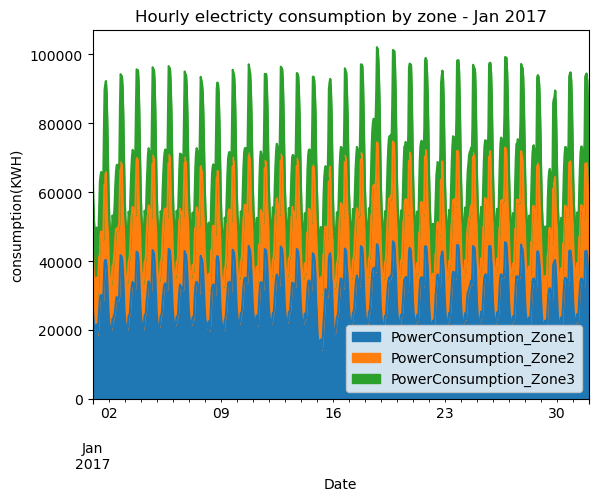

In [724]:
df2.plot.area(title="Hourly electricty consumption by zone - Jan 2017", xlabel="Date", ylabel="consumption(KWH)")

## VISUALIZING USAGE BY DAY OF THE WEEK

In [727]:
df["Day"].dtype
df['Day'] = df['Day'].astype(int).map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)
df = df.sort_values('Day')
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Total_consumption,Hour,Day
39456,2017-10-02 00:00:00,20.550,61.75,4.917,0.077,0.067,30583.45733,17294.19087,13930.21277,61807.86097,0,Monday
29433,2017-07-24 09:30:00,26.530,57.56,4.907,552.100,36.880,36007.97342,30501.26582,24998.15900,91507.39824,9,Monday
29432,2017-07-24 09:20:00,26.120,59.03,4.905,522.700,37.190,35165.98007,30030.37975,24455.89958,89652.25940,9,Monday
29431,2017-07-24 09:10:00,25.890,59.33,4.907,492.700,37.590,35114.95017,28891.13924,24371.54812,88377.63753,9,Monday
29430,2017-07-24 09:00:00,25.700,59.40,4.906,461.800,44.510,34674.81728,25344.30380,23594.30962,83613.43070,9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
22318,2017-06-04 23:40:00,20.460,87.10,0.069,0.051,0.085,40065.69536,24601.24740,24611.44615,89278.38891,23,Sunday
22317,2017-06-04 23:30:00,20.400,87.10,0.067,0.055,0.126,40790.46358,24979.20998,24717.78462,90487.45818,23,Sunday
22316,2017-06-04 23:20:00,20.430,87.10,0.065,0.033,0.133,41171.92053,25185.03119,25113.60000,91470.55172,23,Sunday
22314,2017-06-04 23:00:00,20.550,86.60,0.067,0.066,0.170,41464.37086,25637.83784,25710.27692,92812.48562,23,Sunday


In [729]:
import seaborn as sns

/var/folders/49/td1jd0hx4wv_kk5z1ncw71yr0000gn/T/ipykernel_1434/4148322893.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


[Text(0.5, 1.0, 'Power consumption by day of week and hour')]

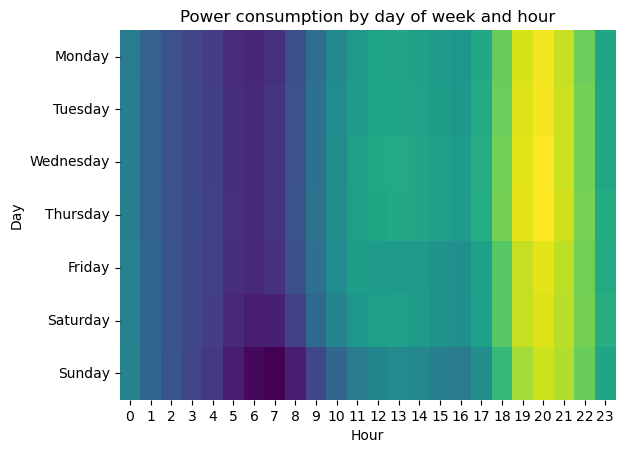

In [731]:
sns.heatmap(
    df.pivot_table(
        index="Day",
        columns="Hour",
        values="Total_consumption",
        aggfunc="mean"
    ),
    cbar = None,
    cmap = "viridis",
    
).set(title = "Power consumption by day of week and hour")